# The Perceptron

## Historical and theoretical background

The work of McCulloch and Pitts introduced one of the first biologically inspired models of cognition. This approach was powerful in so far it was able to emulate a wide variety of boolean functions by combining simple binary computational units. However, the architecture lacked several characteristics of biological networks: complex connectivity patterns, processing of continuous values (rather than just binary), and critically, a learning procedure. Further, the fact that brain activity tends to be noisy and seemingly stochastic did not fit well with the consistency and predictability required by the McCulloch and Pitts model to work. 

With an eye in all the aforementioned limitations of the early neural network models, Frank Rosenblatt introduced the so-called "Perceptron" in 1958. Rosenblatt contextualized his model in the broader discussion about the nature of the cognitive skills of higher-order organisms, or more plainly, how cognition works. On Rosenblatt's (1958) view, three fundamental questions must be answered to understand this phenomenon, which can be summarized as the problems of *detection*, *storage*, and the *effect of the stored information* in further perceptual and behavioral processes.

Rosenblatt delegated the first question to the discipline of sensory physiology, deciding to concentrate in the last two. Next, we will examine these problems one by one.

### The information storage problem

When your brain forms a memory about something, what shape does it take? If brains stored information as computers do, the answer will be relatively straightforward: as patterns of zeros and ones. Unfortunately, figuring this out is not as simple as with human artifacts like digital computers.

According to Rosenblatt, at the time, and I'd argue, to a certain extent today, they were two approaches to the information storage problem: the *coded representations* approach and the *connectionist* approach. The former postulates that sensory information is stored in the form of *coded representations* or images, with some sort of one-to-one mapping between the sensory stimulus and the stored pattern. As an analogy, think about those shape-matching toys for kids. Let's say you perceived a triangle, then, a triangle-shaped hole would be "carved" in the memory space of your metaphorical "board-brain". **Figure 1** shows an example of this process. Once the shape is carved, you would be able to precisely retrieve the information stored in a particular location in the brain, in the same manner, that you can know that a triangle goes in a particular hole in a shape-matching toy just by looking at it. In the brain, this "carved shape" takes the form of precise patterns of connectivity between groups of neurons. So precise, that you should be able to tell the contents encoded in an arrangement of neurons just by looking at how they are wired together. This is the notion that most science fiction movies implicitly adopt: every attempt to "transfer" the contents of the mind into a machine and vice-versa, presumes that such contents are coded in a way so precise that makes them easily identifiable and transferable. 
 
The connectionist approach takes a radically different perspective: there is no such thing as "records" or "images" of any kind in the brain.  When you perceive a triangle, no memory of a triangle is "imprinted" in the brain. "That is nonsense"  you may be thinking "How could I be able to remember the shape of a triangle if there is no 'image' of a triangle imprinted in my bran?". That is a fair question. According to Rosenblatt, the key is that memories are stored as preferences for a particular "response" rather than "topographic representations".  By "response", Rosenblatt meant the electrochemical activity of any group of associated neurons, as well as any behavioral response of the organism as a whole.

Think about it in this manner: there is no unique cluster of neurons, wired in an invariant manner, that "code" the memory of a triangle. What we have instead, is a series of associations among an unprecise set of neurons, that -importantly- "tend to react" in the presence of any stimulus that looks like a triangle. It does not even need to be exactly a triangle: any shape somewhat similar may trigger at least a partial reaction in those neurons (and maybe in a few more or less too). Going back to the shape-matching toy analogy, the coded representation approach needs a perfectly crafted wood board to work, very rigid, where each shape has a corresponding hole in the board; whereas the connectionist approach is more of a collection of Play-Doh balls, where each ball can be roughly molded to match shapes that look roughly similar. This means that if you were trying to guess what kind of shapes can be molded by a particular ball of Play-Doh, you may at best get an answer like "stuff with a couple of pointy edges". Of course, this is a very imprecise analogy intended to capture the idea that there aren't perfectly crafted "blueprints" of perceived stimulus in the brain, but partial and flexible activity patterns loosely related to a certain type of stimulus. Importantly, such associations between stimulus and response patterns are stable enough for learning and recognition to work.

<center>Figure 1<center/>
<br style = “line-height:100px;”>
<img src="images/code-theory-memory.svg" width="50%" height: auto/>

### The effect of the stored information in further perceptual and behavioral processes

Once memories have been stored in the brain (in whichever way you think it is more appropriate) now we have the question of how such information impacts further perceptual processes and behavioral responses. In other words, once I learned about the triangle shape, how does having such representation in my brain already impact my reaction to it? Note that by "reaction" we mean anything and everything: from unconscious mental processes to any kind of behavioral response.

By construction, the coded representation perspective entails two separate processes: stimulus-recognition ("yes, I've seen this before") and stimulus-response ("how do I react now").  You first need to match the new triangle to the carved triangle shape in your memory-board, and then you can determine how to react to that. Since the connectivity pattern of neurons is *unique* to each stimulus, you *necessarily* have to use a *different* set of connected neurons to trigger a reaction to the stimulus. Something like a " recognition module" and separate "response module". From a connectionist perspective, the stimulus-recognition and stimulus-response get *blended into one*. Remember that in this view information is stored as associated patterns of neural activity, this is to say, like *stimulus-responses*. It follows that the reaction to the new stimulus will use, at least partially, the same activity patterns that stored the information in the first place. This will hopefully become more clear when we implement the model in an example.

### The foundational principles of the perceptron

To build his model, Rosenblatt took advantage of the advances in research about the fundamental properties of the nervous system at the time. In particular, he took elements from the works of [Donald O. Hebb](https://en.wikipedia.org/wiki/Donald_O._Hebb), [Friedrich Hayek](https://en.wikipedia.org/wiki/Friedrich_Hayek), [Albert Uttley](https://en.wikipedia.org/wiki/Albert_Uttley), and [W. Ross Ashby](https://en.wikipedia.org/wiki/W._Ross_Ashby). Rosenblatt summarized these principles as follow: 
1. The physical connections participating in learning and recognizing a stimulus can vary from organism to organism.
2. The cells involved in learning and recognition are flexible, meaning that the probability of activation, when exposed to a stimulus, can change over time. 
3. Similar stimuli will tend to trigger similar response patterns in the brain, and vice-versa.
4. When memory is forming, the application of a positive and/or a negative reinforcement may facilitate or hinder the process.
5. Similarity is not determined by the perceptual properties of the stimuli, but by a combination of the perceiving system, the stimuli, the context, and the history of interactions between those elements. This last principle indicates that you can't decouple perception and representation from the perceiving system (the organism itself).

In sum, if you pay close attention to these principles, you may start to see how they fit with the more general perspective about stimulus learning and recognition introduced in previous sections.

### The organization of a perceptron

The first exemplar of a perceptron offered by Rosenblatt was the so-called "photo-perceptron", that intended to emulate the functionality of the eye. Rosenblatt would make further improvements to the perceptron architecture, by adding a more general learning procedure and expanding the scope of problems approachable by this model. Here, we will examine the structure and functionality of the photo-perceptron, leaving a more extensive examination of later iterations of the perceptron for the next section. 

In contemporary neural network jargon, we could classify the perceptron as a partially connected three-layer neural network with two hidden layers and threshold activation units, but such terminology was not adopted until much later. The structure of a photo-perceptron, represented in **Figure 2**, can be summarized as follows:
1.  Stimuli "hits" the retina sensory units (S-points) generating a binary response. Graded responses (instead of binary) are allowed in the perceptron, but Rosenblatt avoided such complications on his prototype. In modern jargon, this is the "input layer".
2. The responding sensory units send the signal to a cluster of "association cells" (A-units) in the "projection area" ($A_I$). Nowadays, we would call such a projection area the first "hidden layer". 
3. The association cells will fire, if and only if, the weighted sum of inputs coming from the connected sensory units surpasses a predetermined threshold value ($\theta$).  Signals can be either *excitatory* or *inhibitory*. 
4. The "projection area" ($A_I$) send signals to the "association area" ($A_{II}$) *randomly*. This means that connections between both areas are set at random. Why random? Because this is more similar to what is observed in actual biological neurons. Units in this area will fire following the same rules that $A_I$ units.
5. The last section is called the "response area", and contains a set of units that are activated in the same fashion that units in $A_I$ and $A_{II}$ areas. The response area receives signals, also at random, from the $A_{II}$ activated units. This time, connections between $A_{II}$ and the response area are *bidirectional*, generating a feedback signal from the response area to $A_{II}$. The response area is what we today will call the "output layer".

<center>Figure 2<center/>
<br style = “line-height:100px;”>
<img src="images/photo-perceptron.svg" width="80%" height: auto/>

The "feedback signals" between the response-units and the association-units are crucial because such signals are the ones allowing the network to *learn and self-organize*. Feedback can work in two manners:
1. The response units send an *excitatory signal* to the association area units connected to such units
2. The response units send an *inhibitory signal* to the associated area units not connected to such units

The first mechanism reinforces signals that contribute to the activation of a response unit. The second mechanism suppresses the signals that do not contribute to the activation of the same response unit. In either case, the goal is to build an association between the triplet of stimulus, association-unit activation, and response-unit activation. In other words, a pattern association mechanism. Rosenblatt provided a very detailed analysis of the properties of several variants of this system, but for our purposes, the key is to understand the following: 

1. Repeated exposure to stimulus A, will tend to activate a subset of units in the association area.
2. Repeated activation of a subset of units in the association area, will tend to trigger the response of some units in the response area.
3. The response units that react more often, will send feedback reinforcing the association between their input units in the association area, and its activation.
4. After repeating this cycle several times, such association will grow stronger, until the network will "learn" to fire a unique response when exposed to stimulus A. Then, the stimulus-response association has been created.

This feedback-based learning process is a variant (not an exact implementation) of the so-called "Hebbian learning" mechanism (REF): neurons that fire together, wire together. 

At this point, there is a crucial aspect to remark about the photo-perceptron architecture: the *same* units that trigger the response of a unit A can contribute to triggering the response of unit B. This is relevant as it reveals the fact that *different stimulus* can be represented by *overlapping neural activity*. This idea of representations sharing brain topology and functionality is one of the core principles in neural network approaches in cognitive science.

### The general purpose perceptron trained by error-correction

The version of the perceptron that is today most widely recognized as "the perceptron", differs from the original photo-perceptron in a few important ways: 
1. the layers ("unit areas" in the photo-perceptron) are fully connected, instead of partially connected at random.
2. the inputs and outputs can be real-valued numbers, instead of only binary values.
3. linear functions are used for the units in the intermediate layers (if any) rather than threshold functions.
4. it implements an error-based learning algorithm instead of the pattern association mechanism of the photo-perceptron.

**Figure 3** displays a graphical representation of this version of the perceptron. In this depiction, is assumed that each area contains three units that are fully connected, with the flow of information moving forward.

<center>Figure 3<center/>
<br style = “line-height:100px;”>
<img src="images/perceptron.svg" width="60%"/>

If you were to open a random textbook or article about the perceptron, the above description is the one you will most likely find. I am mentioning this because is important to emphasize that the perceptron is a more general concept than any particular instantiation of it. Both, the photo-perceptron and the general-purpose perceptron are special cases of the more general learning and recognition system envisioned by Rosenblatt. Nonetheless, the version we are reviewing here is indeed more general than the photo-perceptron. By general, I  mean that it was designed with a wider variety of problems in mind, rather than to emulate the function of the eye like the photo-perceptron. 

Nonetheless, the perceptron has been used primarily to solve **classification problems**. A classification problem is any situation where you have a set of classes, for instance, geometrical shapes, like triangles and squares, and you want to build a network to make predictions based on values that describe characteristics of the object at hand. For example, you may have a pair of values describing the height and width of an object, and based on that, the network should be able to classify the object in the proper class. In contemporary machine learning jargon, the values describing the objects are usually called "features" or "variables", and the label that you want to predict, "target" or "class".

### Why and how the perceptron works

The way on which a perceptron trained by error-correction achieves its goal is by *iteratively adjusting its weights values* (i.e., the value of the links connecting inputs and association units), until it finds a set of weights that allow for the separation of classes in the training set. To properly understand how the perceptron self-adjust and find "good weights" we first have to understand the mathematical formalism and learning algorithm behind it. Hence, we will defer a thorough explanation for the "Perceptron convergence" section.

## Mathematical formalization

Mathematically, the perceptron can be described by: 
- a *linear function* that aggregates the input signals
- a *threshold function* that determines if the response neuron fires or not
- a *learning procedure* to adjust connection weights

We will examine each of these pieces one by one.

### Linear aggregation function

The linear function that aggregates the input signals for a single neuron or processing unit is defined as:

$$
z=b+\sum_{i=1}^nw_ix_i=w_0x_0+w_1 x_1+...+w_nx_n
$$

The $z$ output is used as input for the threshold function $f(z)$. The $b$ constant added at the beginning, the *bias term*, is a way to simplify learning a good threshold value for the network. Consider the original threshold function, which compares the weighted sum of inputs to a threshold $\theta$:

$$
z=\sum_iw_ix_i\geq\theta 
$$

Now, if we subtract $\theta$ from both sides we obtain:

$$
z=\sum_iw_ix_i-\theta\geq\theta - \theta 
$$
$$
z=\sum_iw_ix_i-\theta\geq0
$$

Finally, we can replace $-\theta$ with $b$ to indicate "bias", move the $b$ to the front, and we obtain:

$$
z=b+\sum_iw_ix_i\geq0
$$

Now, the weight for $b$ can be learned along with the weights for the input values.This will become clearer once we review the learning procedure.

### Threshold decision function

The threshold function for the perceptron is defined as:  

$$ \hat{y} = f(z) =
\begin{cases}
+1, & \text{if z > 0} \\
-1, & \text{otherwise}
\end{cases}
$$

where ${z}$ is the output of the linear aggregation function.

### Learning procedure

Here we describe what Rosenblatt (1961) defined as an *error-corrective reinforcement* learning procedure. This was the version analyzed by Minsky and Papert, which probably explains why it was popularized as the standard perceptron. In his 1961 report, "Principles of Neurodynamics", Rosenblatt describes several reinforcement procedures, like monopolar reinforcement, bipolar reinforcement, gamma reinforcement, and others. The most surprising fact about this learning procedure is that is **guaranteed to find a set of weights that will produce the right answer for every training example, as long such a set of weights exists**. Of course, the problem is that for most interesting problems in cognitive science such a set of weights does not exist.  When a classification problem consists of "linearly separable" training cases, the set of weights exist, otherwise, it does not. We will learn about this later.


The error-corrective learning rule is as follow: 
- compute the mismatch between the *obtained value* and the *expected value* for the training exemplar
- if the obtained and expected values match, do nothing
- if the obtained and expected values do not match, compute the difference or delta between those values
- then, use a portion of that value to update the weights of the network

This can be expresed as:

\begin{equation*}
w_{k+1} = w_k + \Delta w_k
\end{equation*}

The $\Delta w_k$ is computed as:

\begin{equation*}
\Delta w_k = \eta(y - \hat{y})x_k
\end{equation*}

where:
- $\eta$ is the learning rate (0 -1 value)
- $y$ is the actual value ("true class")
- $\hat{y}$ is the predicted value ("predicted class")
- $x_k$ is the vector of inputs for case $k$

**Note about the learning rate $\eta$**: the learning rate has the role of facilitating the training process by weighting the delta used to update the weights. This basically means that instead of completely replacing the previous weight with the sum of the weight + delta, we incorporate a **proportion** of the error into the updating process. This makes the learning process more stable over time. 

**Figure 4** shows an schematic representation of the perceptron with the learning procedure.

<center>Figure 4<center/>
<br style = “line-height:100px;”>
<img src="images/perceptron-math.svg" width="60%"/>

### Perceptron convergence

The proof that the perceptron will find a set of weights to solve any linearly separable classification problem is known as the *perceptron convergence theorem*. I will not develop such proof, because involves some advance mathematics that is not assumed to be known by the reader in this introductory text. If you are interested in the proof, see Chapter 4.2 of Rojas (1996) or Chapter 3.5 of Bishop (1995).

Nonetheless, we can offer some geometrical intuition of why the perceptron works. Consider a problem with two classes, let's say, albatross and owls. For each bird, we have measurements of their wingspan and weight. **Figure 5** plots the hypothetical data in a cartesian plane with *weight* in the horizontal axis and *wingspan* in the vertical axis.

<center>Figure 5<center/>
<br style = “line-height:100px;”>
<img src="images/linear-sep-ex.svg" width="60%"/>

From this example, is clear that we can trace a straight line to separate bird species: everything on the left of the dashed line can be classified as an owl, whereas everything at the right as an albatross. This is possible because our sample of owls and albatross are different enough in weight and wingspan so they can be separated using an straight line. Such line is usually called "decision boundary" in machine learning problems. 

In two dimensions is easy to visualize a decision boundary, but this can be extended to higher-dimensional problems, with 3, 4 or any number of dimensions, and visualization becomes tricky. Some people say that mathematicians have this trick where they visualize a 3-dimensional space first, then add, let's say, 5 more dimensions, and then shout in their minds "8 dimensions!" until they convince themselves they can see it.   

In any case, in higher-dimensional spaces, the decision-boundary is usually called a "hyperplane". The trick now is to find that hyperplane. Mathematically, the solution for a linear classification problem (i.e., to find the hyperplane) is defined as:

$$
w_1x_1+w_2x_2+...+w_nx_n+b = 0
$$

The left side of the equation is identical to our definition for the linear aggregation function, which makes sense since the output of the perceptron is determined by this weighted sum. 

An algebraic way to express the same idea is that there must be a set of weights that *simultaneously satisfy these two inequalities*:

$w_1x_1+w_2x_2+...+w_nx_n+b > 0,$ for each input vector belonging to class 1 (albatross)
$w_1x_1+w_2x_2+...+w_nx_n+b \leq 0,$ for each input vector belonging to class -1 (owls)

In vector notation, the above expression is equivalent to:

$w^Tx+b>0, \forall \in {1}$ 

$w^Tx+b\leq 0, \forall \in {-1}$ 

By now you may be wondering "What if the examples are not linearly separable? What if I am comparing owls and falcons? Those are very similar. I bet that doesn't work!" And you will be correct. This is what is known as the "linear separability constrain". We will learn more about that later.

## Code implementation

We will implement the perceptron algorithm from scratch with `python` and `numpy`. The goal is to understand the perceptron step-by-step execution rather than achieving an elegant implementation. I'll break down each step into functions to ensemble everything at the end. 

The scikit-learn implementation can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html). In general, we don't want to re-implemented algorithms that have been thoroughly tested by others, to avoid duplication of work an potential errors in our code. The reason I'm not using sckit-learn to implement the perceptron is that it won't give us any insight at all of what is going on since the entire algorithm has been hidden to the user.

### Generate random weights vector

In [1]:
import numpy as np

def random_weights(X, random_state: int):
    '''create vector of random weights
    Parameters
    ----------
    X: 2-dimensional array, shape = [n_samples, n_features]
    Returns
    -------
    w: array, shape = [w_bias + n_features]'''
    rand = np.random.RandomState(random_state)
    w = rand.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
    return w

Predictions from the percetron are obtained by a linear combination of features and weights. It is common practice to begin with a vector of small random weights that would be updated later by the perceptron learning rule.

### Compute net input

In [2]:
def net_input(X, w):
    '''Compute net input as dot product'''
    return np.dot(X, w[1:]) + w[0]

Here we pass the featue matrix and the previously generated vector of random weights to compute the inner product. Remember that we need to add an extra weight for the bias term at the begining of the vector (`w[0`)

### Compute predictions

In [3]:
def predict(X, w):
    '''Return class label after unit step'''
    return np.where(net_input(X, w) >= 0.0, 1, -1)

This method implements the **threshold function** which takes the net-value of the inner product and outputs a 1 if the predicted value is >= 0, and -1 otherwise. 

### Training loop - Learning rule

In [4]:
def fit(X, y, eta=0.001, n_iter=100):
    '''loop over exemplars and update weights'''
    errors = []
    w = random_weights(X, random_state=1)
    for exemplar in range(n_iter):
        error = 0
        for xi, target in zip(X, y):
            delta = eta * (target - predict(xi, w))
            w[1:] += delta * xi
            w[0] += delta
            error += int(delta != 0.0)
        errors.append(error)
    return w, errors

Let's examine the fit method that implements the learning rule: 

* Create a vector of random weights by using the `random_weights` function with dimensionality equal to the number of columns in the feature matrix.
* Loop over each row of the feature matrix with `for exemplar in range(n_iter)`
* Compute the inner product between the feature vector for row $i$ and the weight vector by using the `predict(xi, w)` function
* Compute the difference between the predicted value and the target value times the learning rate with `delta = eta * (target - predict(xi, w))`
* Update the weights by `w[1:] += delta * xi` and `w[0] += delta`
* We also save the errors for further plotting `errors.append(error)`

## Testing the perceptron

Next, we will test the implementation by creating a simple example: **classifying figures by their shape**. We'll create two type of figures: **tall-figures** and **wide-figures**. As the name suggest, the tall-figures are figures that are taller than wider, and the wider-figures are figures that are wider than taller. 

To accomplish this, we'll sample tall and wide figures at random from a normal distribution by using the following function:

In [5]:
# Define function to create figures type
def figure_type(mu1, sigma1, mu2, sigma2, n_samples, target, seed):
    '''creates [n_sampes, 2] array
    
    Parameters
    ----------
    mu1, sigma1: int, shape = [n_samples, 2]
        mean feature-1, standar-dev feature-1
    mu2, sigma2: int, shape = [n_samples, 2]
        mean feature-2, standar-dev feature-2
    n_samples: int, shape= [n_samples, 1]
        number of sample cases
    target: int, shape = [1]
        target value
    seed: int
        random seed for reproducibility
    
    Return
    ------
    X: ndim-array, shape = [n_samples, 2]
        matrix of feature vectors
    y: 1d-vector, shape = [n_samples, 1]
        target vector
    ------
    X'''
    rand = np.random.RandomState(seed)
    f1 = rand.normal(mu1, sigma1, n_samples)
    f2 = rand.normal(mu2, sigma2, n_samples)
    X = np.array([f1, f2])
    X = X.transpose()
    y = np.full((n_samples), target)
    return X, y

In [6]:
# create tall-figures matrix
T, y_t = figure_type(10, 2, 5, 1, 100, 1, 1)
nl = '\n'
print(f'Feature matrix shape: {T.shape} {nl}target vector shape: {y_t.shape}')
print(f'Feature matrix: {nl}{T[0:4, :]} {nl}target vector: {nl}{y_t[0:4]}')

Feature matrix shape: (100, 2) 
target vector shape: (100,)
Feature matrix: 
[[13.24869073  4.55287144]
 [ 8.77648717  6.2245077 ]
 [ 8.9436565   5.40349164]
 [ 7.85406276  5.59357852]] 
target vector: 
[1 1 1 1]


In [7]:
# create wide-figures matrix
W, y_w = figure_type(5, 1, 10, 2, 100, -1, 2)
nl = '\n'
print(f'Feature matrix shape: {W.shape} {nl}target vector shape: {y_w.shape}')
print(f'Feature matrix: {nl}{W[0:4, :]} {nl}target vector: {nl}{y_w[0:4]}')

Feature matrix shape: (100, 2) 
target vector shape: (100,)
Feature matrix: 
[[ 4.58324215 12.32304298]
 [ 4.94373317 10.7721561 ]
 [ 2.8638039   7.73373345]
 [ 6.64027081 10.86618511]] 
target vector: 
[-1 -1 -1 -1]


To make this clearer, we can create a plot to visualize each figure

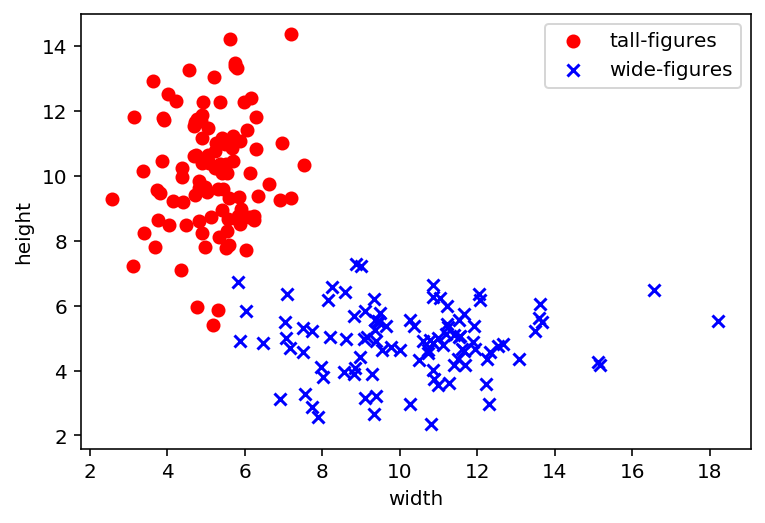

In [8]:
import matplotlib.pyplot as plt
plt.scatter(T[:, 1], T[:, 0], color='red', marker='o', label='tall-figures')
plt.scatter(W[:, 1], W[:, 0], color='blue', marker='x', label='wide-figures')
plt.xlabel('width')
plt.ylabel('height')
plt.legend(loc='upper right')
plt.show()

In [9]:
from sklearn.model_selection import train_test_split

X = np.concatenate((T, W), axis=0)
y = np.concatenate((y_t, y_w), axis=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3,
                                                    random_state=1,
                                                    shuffle=True)

In [10]:
print(f'X_train.shape: {X_train.shape}')
print(f'y_train.shape: {y_train.shape}')
print(f'X_test.shape: {X_test.shape}')
print(f'y_test.shape: {y_test.shape}')

X_train.shape: (140, 2)
y_train.shape: (140,)
X_test.shape: (60, 2)
y_test.shape: (60,)


In [11]:
# fit and predict values
w, errors = fit(X_train, y_train, eta=0.01, n_iter=20 )
y_pred = predict(X_test, w)
nl = '\n'
print(f'vector of weights: {w}{nl}')
print(f'errors at each time step: {errors}{nl}')
print(f'predicted value for each case: {y_pred}{nl}')

vector of weights: [ 0.01624345  0.84235904 -0.76528073]

errors at each time step: [14, 6, 4, 2, 4, 2, 4, 2, 4, 2, 2, 4, 2, 4, 2, 2, 4, 2, 4, 2]

predicted value for each case: [ 1  1  1 -1 -1 -1  1  1  1 -1  1  1  1  1 -1 -1 -1  1 -1  1  1  1  1  1
  1 -1  1  1 -1  1  1 -1 -1 -1 -1  1 -1  1  1 -1 -1 -1 -1  1  1  1 -1  1
 -1 -1  1 -1 -1  1  1 -1 -1 -1 -1 -1]



By printing the prediction error ar each time step we can see that the perceptron predicts each case correctly after 12 training cicles. Let's plot the errors to complement the analysis.

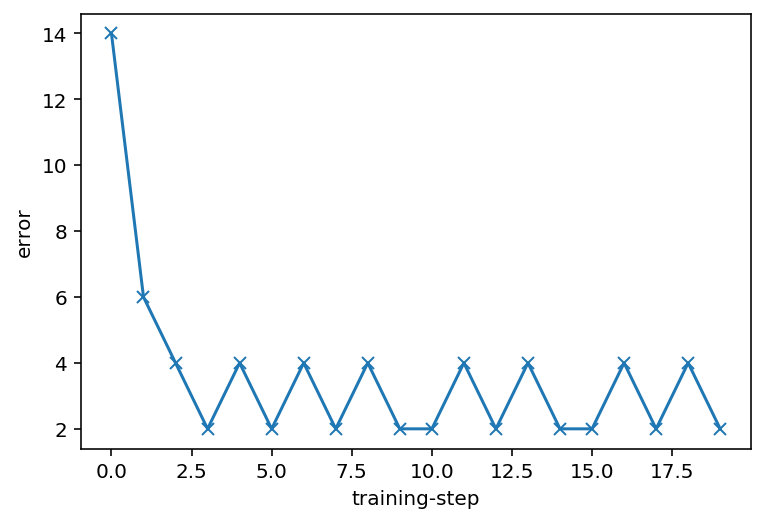

In [12]:
import matplotlib.pyplot as plt 

def plot_errors(errors):
    step = np.arange(0, len(errors))
    fig = plt.figure()
    ax = plt.axes()
    plt.xlabel('training-step')
    plt.ylabel('error')
    ax.plot(step, errors, marker='x')
    return plt.show()

plot_errors(errors)

In [13]:
num_correct_predictions = (y_pred == y_test).sum()
accuracy = (num_correct_predictions / y_test.shape[0]) * 100
print('Test set accuracy: %.2f%%' % accuracy)

Test set accuracy: 98.33%


## The Linear Separability Constrain

As we can see, the perceptron reach ~98% of classification accuracy very fast. Yet, it can't get to 100%. The reason is that perceptron, as linear model, only can perfectly solve 'linearly separable' problems. In the case of our figures dataset, there some small amount of overlap, a few figures that by pure chance are very similar in the 2-D plane of vertical-distance and horizontal-distance. Let's look at the graph again. 

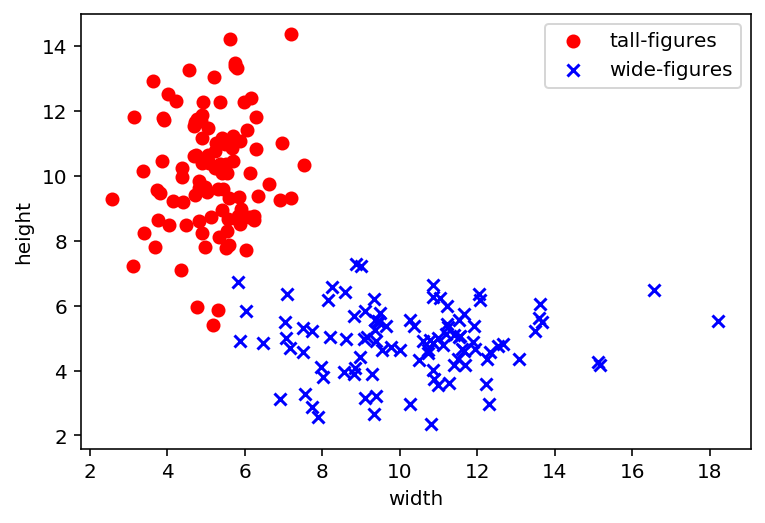

In [14]:
import matplotlib.pyplot as plt
plt.scatter(T[:, 1], T[:, 0], color='red', marker='o', label='tall-figures')
plt.scatter(W[:, 1], W[:, 0], color='blue', marker='x', label='wide-figures')
plt.xlabel('width')
plt.ylabel('height')
plt.legend(loc='upper right')
plt.show()

Near the coordinates (vertical=5, horizontal=5) there are a few data points that can't be separated by fitting a line to the plane because their are almost overlapping. If we create a data set where the data points are further separated, we could get a linear model like the perceptron to work and perfectly classify each instance, but those cases are very unusual and limit the scope of problems that can be approached. This limitation later had a huge impact in the use and research of artificial neural networks, particularly after 1969 when Minsky and Papert published their book 'Perceptrons', where they criticize and show the limitations of  Rosenblatt's work. Later on,  research in artificial neural networks would overcome such limitations by the integration of a combination of multiple layers of processing units, non-linear units, and the backpropagation algorithm. 

## References and Further Reading

- Bishop, C. M. (1995). Neural networks for pattern recognition. Oxford university press.
- Rojas, R. (2013). Neural networks: A systematic introduction. Springer Science & Business Media.
- Rosenblatt, F. (1958). The perceptron: a probabilistic model for information storage and organization in the brain. Psychological review, 65(6), 386.
- Rosenblatt, F. (1961). Principles of neurodynamics: Perceptrons and the theory of brain mechanisms. Cornell Aeronautical Lab Inc Buffalo NY.

**For code implementation:** 

- Raschka, S. (2015). Python machine learning. Packt Publishing Ltd.
